# Import modules

In [1]:
install.packages("openxlsx")
library(openxlsx)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:

library(ggplot2)

In [19]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [31]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load data

## CPI

In [3]:
cpi <- read.xlsx("./dataset/clean_dataset/cpi.xlsx", startRow = 2)
head(cpi, 5)

,Time,Value
,<dbl>,<dbl>
1,44531,-0.18
2,44562,0.19
3,44593,1.00
4,44621,0.70
5,44652,0.18


## GDP

In [4]:
gdp_constant_prices <- read.xlsx("./dataset/clean_dataset/gdp.xlsx", startRow = 2, sheet="GDP (2010)")
head(gdp_constant_prices, 5)

,Time,Value
,<chr>,<dbl>
1,Q4 2021,1467490
2,Q1 2022,1255312
3,Q2 2022,1346821
4,Q3 2022,1376321
5,Q4 2022,1538951


In [5]:
gdp_current <- read.xlsx("./dataset/clean_dataset/gdp.xlsx", startRow = 2, sheet="GDP")
head(gdp_current, 5)

,Time,Value
,<chr>,<dbl>
1,Q4 2021,2399005
2,Q1 2022,2132796
3,Q2 2022,2292012
4,Q3 2022,2373152
5,Q4 2022,2669131


In [6]:
gdp_per_capita <- read.xlsx("./dataset/clean_dataset/gdp.xlsx", startRow = 2, sheet="GDPng")
head(gdp_per_capita, 5)

,Time,Value
,<dbl>,<dbl>
1,2022,95.6
2,2023,101.9
3,2024,114.0


## Exchange market

In [ ]:
usd_exchange_market <- read.csv("./dataset/clean_dataset/exchange_market.csv")
head(usd_exchange_market, 5)

,Time,Value
,<chr>,<dbl>
1,2022-01-03,22855
2,2022-01-04,22756
3,2022-01-05,22760
4,2022-01-06,22748
5,2022-01-07,22755


# Process data

In [ ]:
data.frame(Column = names(usd_exchange_market),
           Class = sapply(usd_exchange_market, class))

,Column,Class
,<chr>,<chr>
Time,Time,character
Value,Value,numeric


In [ ]:
usd_exchange_market$Time <- as.Date(usd_exchange_market$Time)
head(usd_exchange_market, 5)

,Time,Value
,<date>,<dbl>
1,2022-01-03,22855
2,2022-01-04,22756
3,2022-01-05,22760
4,2022-01-06,22748
5,2022-01-07,22755


# Perform descriptive statistics

## CPI

In [ ]:
summary(cpi)

      Time           Value       
 Min.   :44531   Min.   :-0.340  
 1st Qu.:44820   1st Qu.: 0.075  
 Median :45108   Median : 0.290  
 Mean   :45109   Mean   : 0.310  
 3rd Qu.:45398   3rd Qu.: 0.450  
 Max.   :45689   Max.   : 1.080  

## GDP

In [ ]:
summary(gdp_constant_prices)

     Time               Value        
 Length:13          Min.   :1255312  
 Class :character   1st Qu.:1376321  
 Mode  :character   Median :1450322  
                    Mean   :1465231  
                    3rd Qu.:1538951  
                    Max.   :1773652  

In [ ]:
summary(gdp_current)

     Time               Value        
 Length:13          Min.   :2132796  
 Class :character   1st Qu.:2373152  
 Mode  :character   Median :2513091  
                    Mean   :2573952  
                    3rd Qu.:2727565  
                    Max.   :3297408  

In [ ]:
summary(gdp_per_capita)

      Time          Value       
 Min.   :2022   Min.   : 95.60  
 1st Qu.:2022   1st Qu.: 98.75  
 Median :2023   Median :101.90  
 Mean   :2023   Mean   :103.83  
 3rd Qu.:2024   3rd Qu.:107.95  
 Max.   :2024   Max.   :114.00  

## Exchange market

In [ ]:
summary(usd_exchange_market)

      Time                Value      
 Min.   :2022-01-03   Min.   :22635  
 1st Qu.:2022-10-25   1st Qu.:23464  
 Median :2023-08-16   Median :24264  
 Mean   :2023-08-16   Mean   :24204  
 3rd Qu.:2024-06-06   3rd Qu.:24987  
 Max.   :2025-03-31   Max.   :25641  

# Visualize

## CPI

In [ ]:
head(cpi, 5)

,Time,Value
,<dbl>,<dbl>
1,44531,-0.18
2,44562,0.19
3,44593,1.00
4,44621,0.70
5,44652,0.18


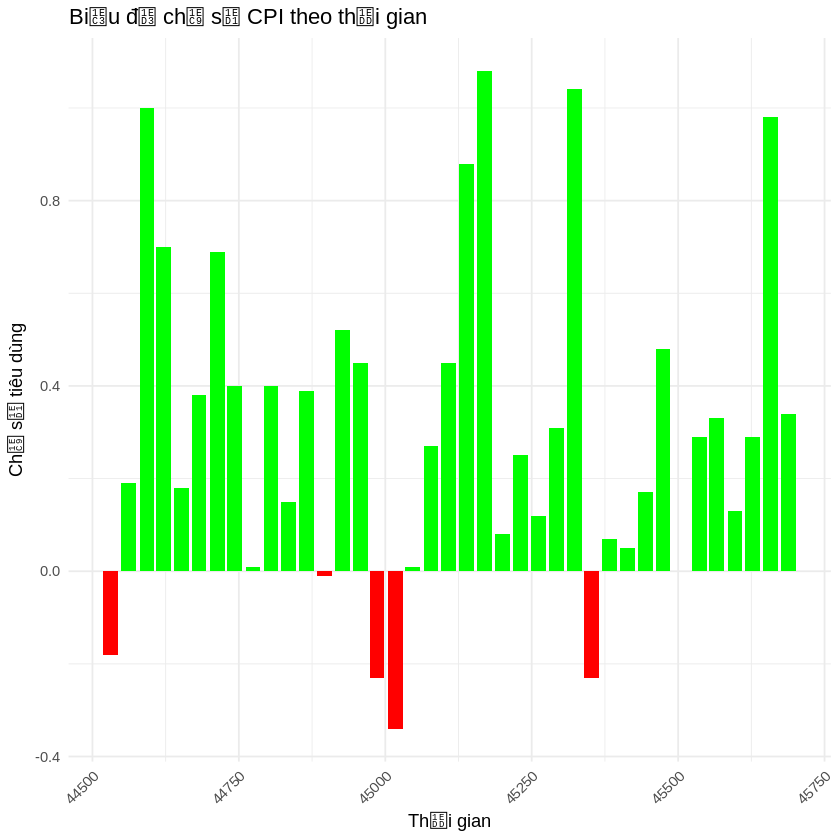

In [8]:
cpi$color <- ifelse(cpi$Value > 0, "green", "red")

ggplot(cpi, aes(x = Time, y = Value , fill = color)) +
  geom_col() +
  scale_fill_identity() +
  labs(
    title = "Biểu đồ chỉ số CPI theo thời gian",
    x = "Thời gian",
    y = "Chỉ số tiêu dùng"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

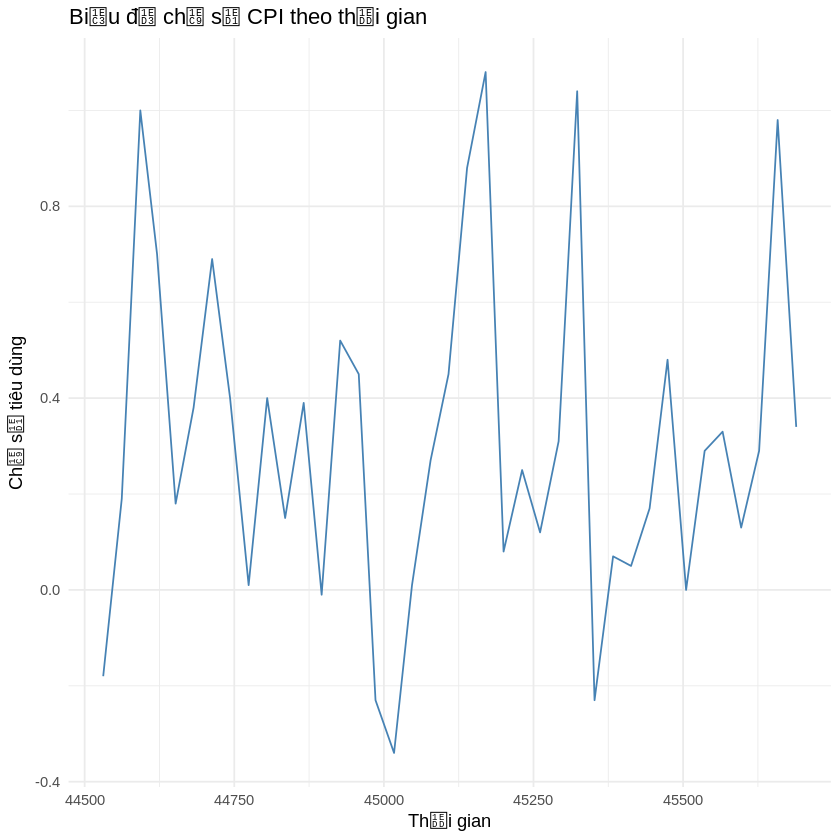

In [ ]:

ggplot(cpi, aes(x = Time, y = Value)) +
  geom_line(color = "steelblue") +
  labs(title = "Biểu đồ chỉ số CPI theo thời gian",
       x = "Thời gian", y = "Chỉ số tiêu dùng") +
  theme_minimal()

## GDP

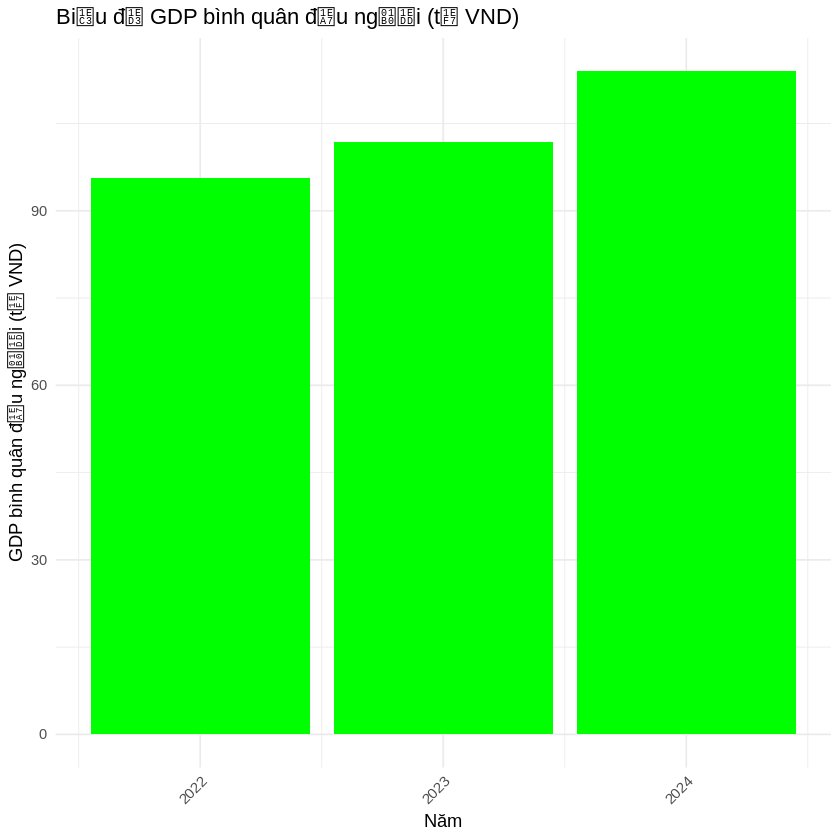

In [9]:
gdp_per_capita$color <- ifelse(gdp_per_capita$Value > 0, "green", "red")

ggplot(gdp_per_capita, aes(x = Time, y = Value , fill = color)) +
  geom_col() +
  scale_fill_identity() +
  labs(
    title = "Biểu đồ GDP bình quân đầu người (tỷ VND)",
    x = "Năm",
    y = "GDP bình quân đầu người (tỷ VND)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

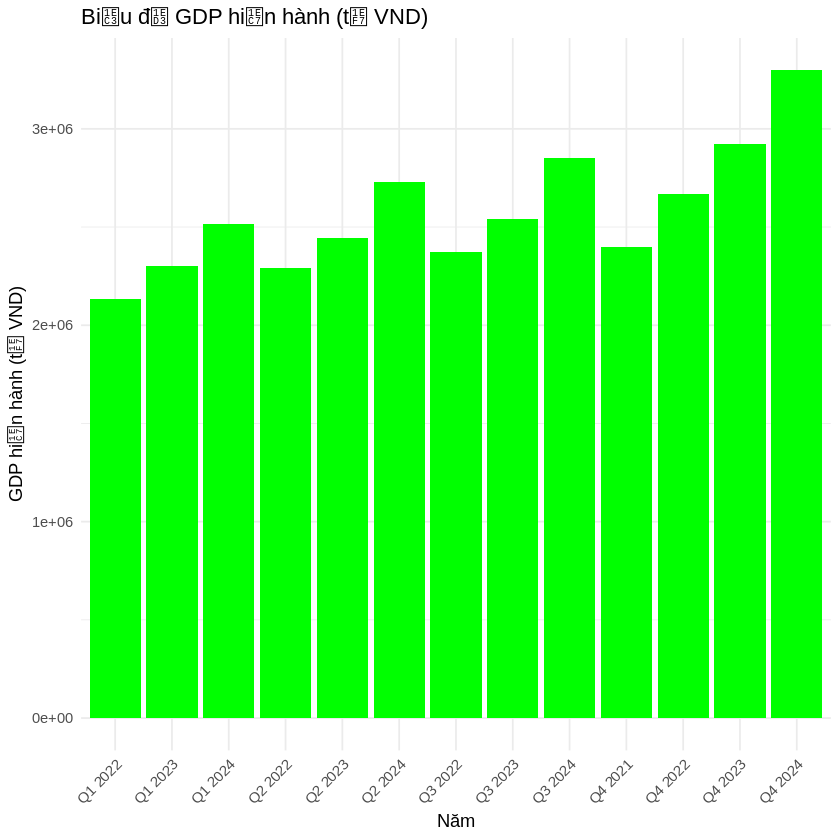

In [10]:
gdp_current$color <- ifelse(gdp_current$Value > 0, "green", "red")

ggplot(gdp_current, aes(x = Time, y = Value , fill = color)) +
  geom_col() +
  scale_fill_identity() +
  labs(
    title = "Biểu đồ GDP hiện hành (tỷ VND)",
    x = "Năm",
    y = "GDP hiện hành (tỷ VND)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

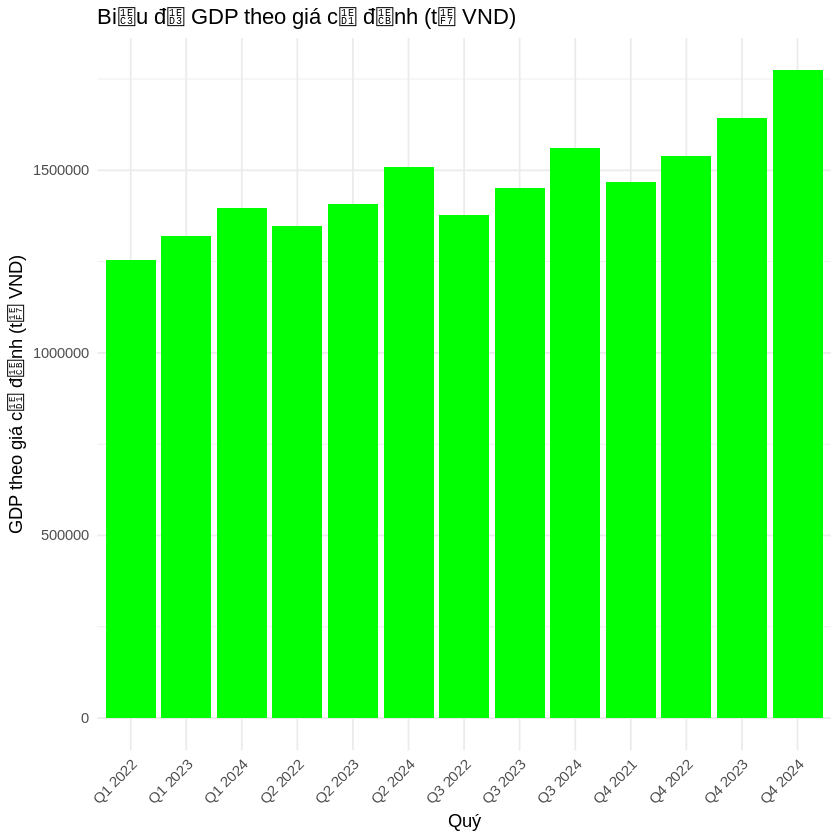

In [11]:
gdp_constant_prices$color <- ifelse(gdp_constant_prices$Value > 0, "green", "red")

ggplot(gdp_constant_prices, aes(x = Time, y = Value , fill = color)) +
  geom_col() +
  scale_fill_identity() +
  labs(
    title = "Biểu đồ GDP theo giá cố định (tỷ VND)",
    x = "Quý",
    y = "GDP theo giá cố định (tỷ VND)"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [32]:
gdp = merge(gdp_constant_prices, gdp_current, by.x="Time", by.y="Time")
gdp <- gdp %>%
  mutate(
    Quarter = str_extract(Time, "Q\\d"),
    Year = str_extract(Time, "\\d{4}"),
    Month = case_when(
      Quarter == "Q1" ~ "03",
      Quarter == "Q2" ~ "06",
      Quarter == "Q3" ~ "09",
      Quarter == "Q4" ~ "12"
    ),
    Date = ymd(paste(Year, Month, "01", sep = "-"))
  )
gdp

Time,Value.x,color.x,Value.y,color.y,Quarter,Year,Month,Date
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>
Q1 2022,1255312,green,2132796,green,Q1,2022,03,2022-03-01
Q1 2023,1320755,green,2300882,green,Q1,2023,03,2023-03-01
Q1 2024,1396660,green,2513091,green,Q1,2024,03,2024-03-01
Q2 2022,1346821,green,2292012,green,Q2,2022,06,2022-06-01
Q2 2023,1407473,green,2444649,green,Q2,2023,06,2023-06-01
Q2 2024,1508387,green,2727565,green,Q2,2024,06,2024-06-01
Q3 2022,1376321,green,2373152,green,Q3,2022,09,2022-09-01
Q3 2023,1450322,green,2540588,green,Q3,2023,09,2023-09-01
Q3 2024,1561963,green,2849908,green,Q3,2024,09,2024-09-01


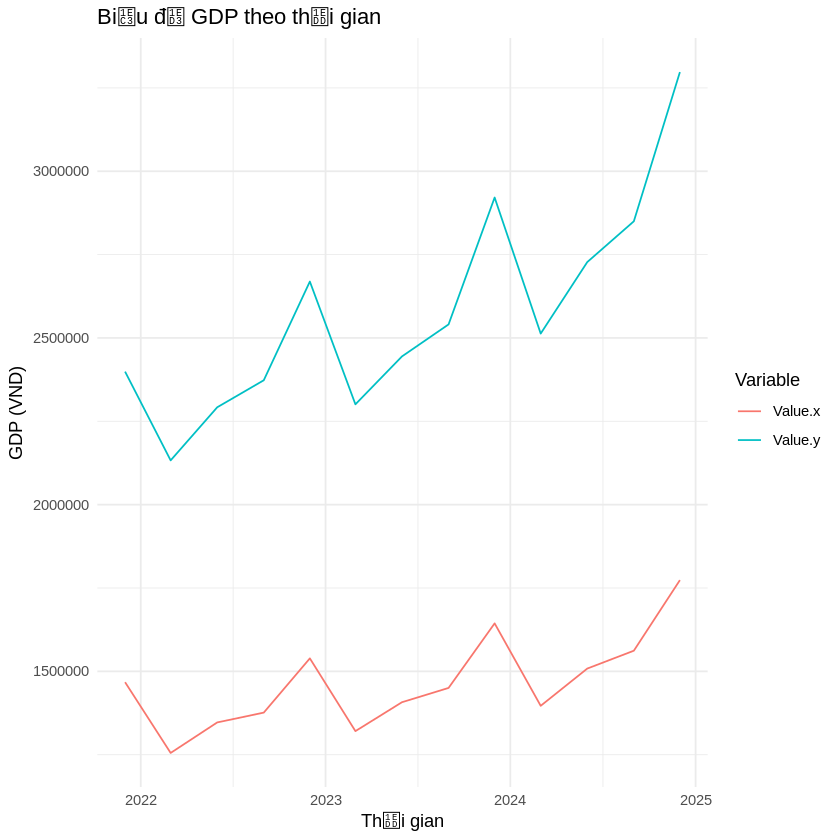

In [33]:
data_long <- gdp %>%
  pivot_longer(cols = c("Value.x", "Value.y"),
              names_to = "Variable",
              values_to = "Value")

ggplot(data_long, aes(x = Date, y = Value, color = Variable)) +
  geom_line() +
  labs(title = "Biểu đồ GDP theo thời gian", x = "Thời gian", y = "GDP (VND)") +
  theme_minimal()

## Exchange market

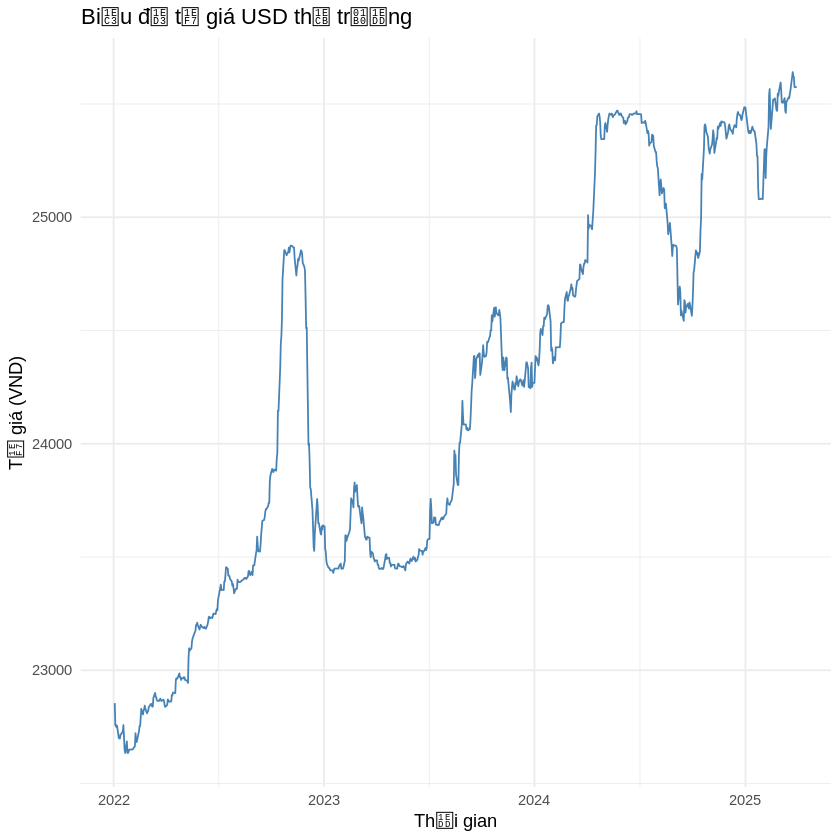

In [ ]:
ggplot(usd_exchange_market, aes(x = Time, y = Value)) +
  geom_line(color = "steelblue") +
  labs(title = "Biểu đồ tỷ giá USD thị trường",
       x = "Thời gian", y = "Tỷ giá (VND)") +
  theme_minimal()